In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train=pd.read_csv('Training Data.csv')
test=pd.read_csv('Test Data.csv')
test6=pd.read_csv('Test Data.csv')

In [2]:
train['state']=train['state'].str.replace("_"," ")
train['city']=train['city'].str.replace("_"," ")
train['profession']=train['profession'].str.replace("_"," ")
test['city']=test['city'].str.replace("_"," ")

In [3]:
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical engineer,Rewa,Madhya Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil servant,Tiruchirappalli[10],Tamil Nadu,3,14,1


ValueError: `bins` must increase monotonically, when an array

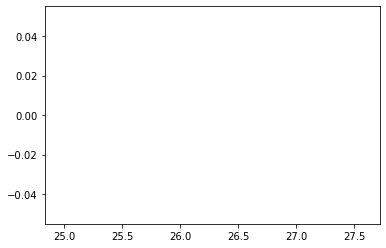

In [26]:
import seaborn as sns
sns.distplot(train['profession'],train['risk_flag'])

In [4]:
print(train['state'].nunique(),train['city'].nunique(),train['profession'].nunique())

29 317 51


In [5]:
df=pd.concat([train,test])

In [6]:
from sklearn.preprocessing import LabelEncoder
x=['house_ownership','married','city','state','car_ownership','profession']
for i in x:
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])
  df[i]=df[i]+1

In [7]:
print(df['state'].nunique(),df['city'].nunique(),df['profession'].nunique())

29 317 51


In [8]:
income_area=df['income']/(df['profession']+df['city']+df['state'])

In [9]:
df['income_area']=income_area

In [10]:
df['age_married']=df.groupby(['age','married'])['Id'].transform('count')
df['age_house']=df.groupby(['age','house_ownership'])['Id'].transform('count')
df['age_car']=df.groupby(['age','car_ownership'])['Id'].transform('count')
df['exp_prof']=df.groupby(['experience','profession'])['Id'].transform('count')
df['exp_curr_prof']=df.groupby(['current_job_years','profession'])['Id'].transform('count')
#df['city_state']=df.groupby(['city','state'])['Id'].transform('count')
df['inc_city']=df.groupby(['income','city'])['Id'].transform('count')
df['inc_state']=df.groupby(['income','state'])['Id'].transform('count')
df['inc_prof']=df.groupby(['income','profession'])['Id'].transform('count')
#df['car_inc']=df.groupby(['car_ownership','income'])['Id'].transform('count')
df['house_cyears']=df.groupby(['house_ownership','current_house_years'])['Id'].transform('count')
#df['prof_cyears']=df.groupby(['profession','current_job_years'])['Id'].transform('count')
df['prof_city_unique']=df.groupby(['profession','city'])['Id'].transform('nunique')
df['prof_state_unique']=df.groupby(['profession','state'])['Id'].transform('nunique')
df['prof_income_unique']=df.groupby(['profession','income'])['Id'].transform('nunique')
df['inc_state_unique']=df.groupby(['income','state'])['Id'].transform('nunique')
df['prof_car_unique']=df.groupby(['profession','car_ownership'])['Id'].transform('nunique')
df['prof_house_unique']=df.groupby(['profession','house_ownership'])['Id'].transform('nunique')
#df['exp_prof_unique']=df.groupby(['experience','profession'])['Id'].transform('nunique')

In [11]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,...,inc_city,inc_state,inc_prof,house_cyears,prof_city_unique,prof_state_unique,prof_income_unique,inc_state_unique,prof_car_unique,prof_house_unique
0,1.0,1303835,23,3,2,3,1,34,252,14,...,37,37,37,46460,38,188,37,37,3612,4775
1,2.0,7574516,40,10,2,3,1,44,228,15,...,37,37,37,46460,71,517,37,37,3521,4467
2,3.0,3991815,66,4,1,3,1,48,9,13,...,33,33,33,44664,36,129,33,33,3729,4964
3,4.0,6256451,41,2,2,3,2,44,55,18,...,35,35,35,48078,74,159,35,35,1532,4467
4,5.0,5768871,47,11,2,3,1,12,297,23,...,36,36,36,44680,39,374,36,36,2894,4024


In [12]:
#df['inc_age_pro_min']=df.groupby(['income','age'])['profession'].transform('min')
df['inc_age_pro_max']=df.groupby(['income','age'])['profession'].transform('max')
df['inc_age_pro_sum']=df.groupby(['income','age'])['profession'].transform('sum')
#df['inc_age_pro_count']=df.groupby(['income','age'])['profession'].transform('count')
df['inc_age_pro_mean']=df.groupby(['income','age'])['profession'].transform('mean')
#df['inc_age_pro_unique']=df.groupby(['income','age'])['profession'].transform('nunique')

In [13]:
df['inc_city_pro_min']=df.groupby(['income','city'])['profession'].transform('min')
df['inc_city_pro_max']=df.groupby(['income','city'])['profession'].transform('max')
#df['inc_city_pro_sum']=df.groupby(['income','city'])['profession'].transform('sum')
df['inc_city_pro_count']=df.groupby(['income','city'])['profession'].transform('count')
#df['inc_city_pro_mean']=df.groupby(['income','city'])['profession'].transform('mean')
df['inc_city_pro_unique']=df.groupby(['income','city'])['profession'].transform('nunique')

In [14]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,...,inc_state_unique,prof_car_unique,prof_house_unique,inc_age_pro_max,inc_age_pro_sum,inc_age_pro_mean,inc_city_pro_min,inc_city_pro_max,inc_city_pro_count,inc_city_pro_unique
0,1.0,1303835,23,3,2,3,1,34,252,14,...,37,3612,4775,34,1360,34.0,34,34,40,1
1,2.0,7574516,40,10,2,3,1,44,228,15,...,37,3521,4467,44,1760,44.0,44,44,40,1
2,3.0,3991815,66,4,1,3,1,48,9,13,...,33,3729,4964,48,1920,48.0,48,48,40,1
3,4.0,6256451,41,2,2,3,2,44,55,18,...,35,1532,4467,44,1760,44.0,44,44,40,1
4,5.0,5768871,47,11,2,3,1,12,297,23,...,36,2894,4024,12,480,12.0,12,12,40,1


In [15]:
#df['state_city_pro_unique']=df.groupby(['state','city','profession'])['Id'].transform('nunique')
df['state_city_pro_count']=df.groupby(['state','city','profession'])['Id'].transform('count')
df['age_pro_income_unique']=df.groupby(['age','profession','income'])['Id'].transform('nunique')
#df['age_pro_income_count']=df.groupby(['age','profession','income'])['Id'].transform('count')

In [16]:
df = pd.get_dummies(df, columns=['married','house_ownership','car_ownership','experience'])

In [17]:
train = df[df['risk_flag'].isnull()==False]
test = df[df['risk_flag'].isnull()==True]
del test['risk_flag']

In [18]:
from math import sqrt 
from sklearn.metrics import roc_auc_score

In [19]:
train_df=train.copy()
test_df=test.copy()
test_df.drop(['id'],axis=1,inplace=True)
train_df.drop(['id'],axis=1,inplace=True)
test_df.drop(['Id'],axis=1,inplace=True)
train_df.drop(['Id'],axis=1,inplace=True)

In [20]:
y = train_df.loc[:,'risk_flag']
X = train_df.drop('risk_flag',axis = 1)
X

,income,age,profession,city,state,current_job_years,current_house_years,income_area,age_married,age_house,...,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_20
0,1303835,23,34,252,14,3,13,4346.116667,3899,4015,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,44,228,15,9,13,26392.041812,3665,3843,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,48,9,13,4,10,57025.928571,452,4838,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,44,55,18,2,12,53473.940171,4417,4494,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,12,297,23,3,14,17376.117470,4171,4172,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,46,163,29,6,11,34264.214286,3843,3821,...,0,0,1,0,0,0,0,0,0,0
251996,2843572,26,4,252,14,6,11,10531.748148,3661,3853,...,0,0,0,0,0,0,0,0,0,0
251997,4522448,46,18,145,15,7,12,25407.011236,3124,3454,...,0,0,0,0,0,0,0,0,0,0
251998,6507128,45,28,234,19,0,10,23157.039146,4500,4473,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#X.drop(['city'],axis=1,inplace=True)
#test_df.drop(['city'],axis=1,inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state = 121)

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
print('TEST: ',roc_auc_score(y_val,sgd.predict(x_val)),'TRAIN: ',roc_auc_score(y_train,sgd.predict(x_train)))

TEST:  0.4995165155116775 TRAIN:  0.49990074707466575


In [913]:
from sklearn.ensemble import AdaBoostClassifier

In [914]:
from sklearn.metrics import roc_auc_score,auc
from lightgbm import LGBMClassifier
model = LGBMClassifier(verbose=100,boosting_type='gbdt',n_estimators=10000,depth=10,learning_rate=.01,
                       objective='binary',metric='auc',is_unbalance=True,colsample_bytree=0.3,reg_alpha=2,
            reg_lambda=2,min_gain_to_split=0.0222415,min_child_weight=39.3259775,
            silent=-1,random_state=121,n_jobs=-1,num_leaves = 250,num_trees = 500,num_threads = 16,
                       min_data_in_leaf = 0,min_sum_hessian_in_leaf = 0) 
clf = model.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=0.0222415, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0222415
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=39.3259775 will be ignored. Current value: min_sum_hessian_in_leaf=0
[LightGBM] [Warning] num_threads is set=16, n_jobs=-1 will be ignored. Current value: num_threads=16
[LightGBM] [Warning] num_iterations is set=500, num_trees=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Cannot set both min_data_in_leaf and min_sum_hessian_in_leaf to 0. Will set min_data_in_leaf to 1.
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=0.0222415, 

[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 21
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 22
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 32
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 23
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 21
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 26
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 27
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 28
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 22
[Light

[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 23
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 28
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 28
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 21
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 23
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 19
[Light

[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 24
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 22
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 23
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 22
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 22
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 21
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 31
[Light

[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 26
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 26
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 22
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 23
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 22
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 23
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 250 and max_depth = 29
[Light

In [915]:
print('TEST: ',roc_auc_score(y_val,clf.predict(x_val)),'TRAIN: ',roc_auc_score(y_train,clf.predict(x_train)))

TEST:  0.8904459425324047 TRAIN:  0.8930722865460062


In [620]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [621]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(LGBMClassifier(verbose=100,boosting_type='gbdt',n_estimators=10000,depth=10,learning_rate=.01,
                       objective='binary',metric='auc',is_unbalance=True,colsample_bytree=0.3,reg_alpha=2,
            reg_lambda=2,min_gain_to_split=0.0222415,min_child_weight=39.3259775,
            silent=-1,random_state=121,n_jobs=-1,num_leaves = 250,num_trees = 500,num_threads = 16,
                       min_data_in_leaf = 0,min_sum_hessian_in_leaf = 0) ,
          k_features=25,
          forward=True,
          floating=False,
          scoring = 'roc_auc',
          cv = 0)

In [622]:
sfs.fit(X, y)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=0.0222415, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0222415
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=39.3259775 will be ignored. Current value: min_sum_hessian_in_leaf=0
[LightGBM] [Warning] num_threads is set=16, n_jobs=-1 will be ignored. Current value: num_threads=16
[LightGBM] [Warning] num_iterations is set=500, num_trees=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Cannot set both min_data_in_leaf and min_sum_hessian_in_leaf to 0. Will set min_data_in_leaf to 1.
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=0.0222415, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 147 and max_depth = 25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 153 and max_depth = 25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 157 and max_depth = 27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 146 and max_depth = 27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 149 and max_depth = 25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 155 and max_depth = 25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 168 and max_depth = 28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 151 and max_depth = 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 181 and max_depth = 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 152 and max_depth = 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 164 and max_depth = 31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 164 and max_depth = 28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 109 and max_depth = 21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 77 and max_depth = 19
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 126 and max_depth = 26
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 158 and max_depth = 26
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 118 and max_depth = 21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 157 and max_depth = 25
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 16

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 71 and max_depth = 23
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 127 and max_depth = 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 42 and max_depth = 17
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 107 and max_depth = 32
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 81 and max_depth = 18
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 63 and max_depth = 16
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 128 a

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 55 and max_depth = 21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 142 and max_depth = 35
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 182 and max_depth = 32
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 79 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 135 and max_depth = 35
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 66 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 109 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 181 and max_depth = 47
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 211 and max_depth = 49
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and max_depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 6 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 214 and max_depth = 42
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 175 and 

Exception ignored on calling ctypes callback function: <function _log_callback at 0x000002566067A940>
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\lightgbm\basic.py", line 24, in _log_callback
    def _log_callback(msg):
KeyboardInterrupt: 


No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 211 and max_depth = 34
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 209 and max_depth = 34
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 55 and max_depth = 19
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 201 and max_depth = 40
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 173 and max_depth = 32
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 1 and max_depth = 1
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=0.0222415, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0222415
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=39.3259775 will be ignored. Current value: min_sum_hessian_in_leaf=0
[LightGBM] [Warning] num_threads is set=16, n_jobs=-1 will be ignored. Current value: num_threads=16
[LightGBM] [Warning] num_iterations is set=500, num_trees=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Cannot set both min_data_in_leaf and min_sum_hessian_in_leaf to 0. Will set min_data_in_leaf to 1.
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=0.0222415, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 38 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 35 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 33 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and max_depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 33 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 32 and max_depth = 11
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 35 and m

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 36 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 35 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 42 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 41 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 36 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 45 and ma

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 42 and max_depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 40 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and max_depth = 3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 44 and max_depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 39 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 15 and max_depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 36 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 39 and max_depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 49 and max_depth = 14
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 12 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 2 and max_depth = 1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 48 and max_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 36 and max_depth = 13
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 50 and max_depth = 18
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 45 and max_depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 13 and max_depth = 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 45 and max_depth = 18
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 14 and max

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 52 and max_depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 52 and max_depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 52 and max_depth = 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and max_depth = 7
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 5 and max_dep


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(cv=0,
                          estimator=LGBMClassifier(colsample_bytree=0.3,
                                                   depth=10, is_unbalance=True,
                                                   learning_rate=0.01,
                                                   metric='auc',
                                                   min_child_weight=39.3259775,
                                                   min_data_in_leaf=0,
                                                   min_gain_to_split=0.0222415,
                                                   min_sum_hessian_in_leaf=0,
                                                   n_estimators=10000,
                                                   num_leaves=250,
                                                   num_threads=16,
                                                   num_trees=500,
                                                   objective='binary',
                            

In [625]:
sfs.k_feature_names_ 

()

In [624]:
y_pred=clf.predict(test_df)

In [290]:
y_pred=y_pred.astype('int')
sub=pd.DataFrame({'id':test6['id'],
                 'risk_flag':y_pred})
sub.to_csv('mean33.csv',index=False)

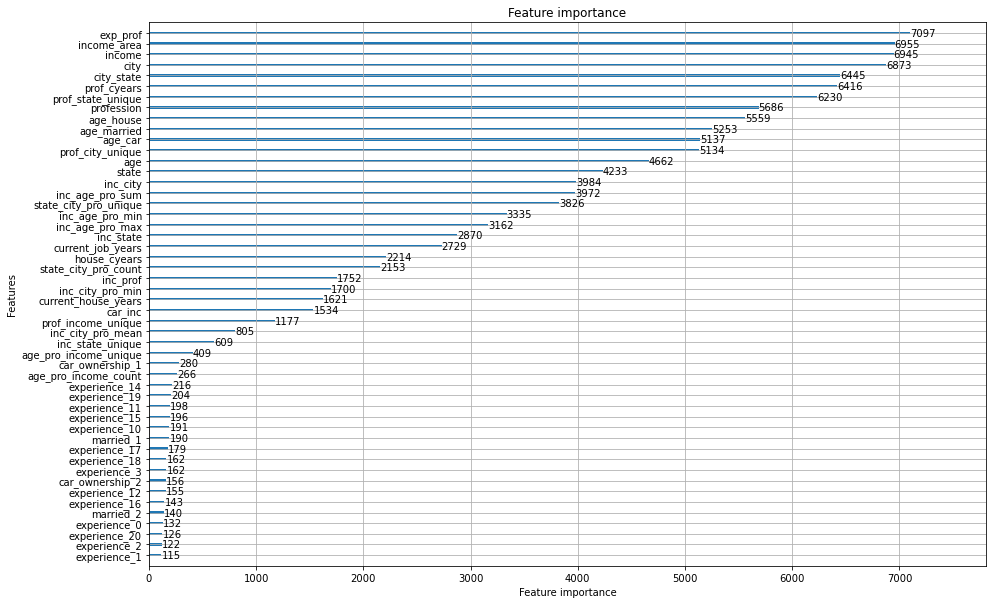

In [316]:
import lightgbm
import matplotlib.pyplot as plt
ax = lightgbm.plot_importance(clf, max_num_features=50, figsize=(15,10))
plt.show()

In [64]:
best_feat=['income',
 'age',
 'profession',
 'city',
 'state',
 'income_area',
 'age_car',
 'car_inc',
 'prof_cyears',
 'prof_state_unique']
X_best=train_df[best_feat]
y_best=train_df['risk_flag']

In [86]:
import pandas as pd
import numpy as np

from timefold import timefold
from sklearn import preprocessing


def target_encoder(df, column, target, index=None, method='mean'):
    """
    Target-based encoding is numerization of a categorical variables via the target variable. Main purpose is to deal
    with high cardinality categorical features without exploding dimensionality. This replaces the categorical variable
    with just one new numerical variable. Each category or level of the categorical variable is represented by a
    summary statistic of the target for that level.
    Args:
        df (pandas df): Pandas DataFrame containing the categorical column and target.
        column (str): Categorical variable column to be encoded.
        target (str): Target on which to encode.
        index (arr): Can be supplied to use targets only from the train index. Avoids data leakage from the test fold
        method (str): Summary statistic of the target. Mean, median or std. deviation.
    Returns:
        arr: Encoded categorical column.
    """

    index = df.index if index is None else index # Encode the entire input df if no specific indices is supplied

    if method == 'mean':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].mean())
    elif method == 'median':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].median())
    elif method == 'std':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].std())
    else:
        raise ValueError("Incorrect method supplied: '{}'. Must be one of 'mean', 'median', 'std'".format(method))

    return encoded_column





labelencoder = preprocessing.LabelEncoder()
df['city'] = labelencoder.fit_transform(df['city'])
df['profession'] = labelencoder.fit_transform(df['profession'])
df['state'] = labelencoder.fit_transform(df['state'])
df

# Cross-validation setup using timefold
timefolds = timefold.timefold(method='window', folds=2)

for fold, (train_Idx, test_Idx) in enumerate(timefolds.split(df)):
    train_Idx = train_Idx

train_Idx, test_Idx

df['city'] = target_encoder(df, column='city', target='risk_flag', method='mean')
df

df['profession'] = target_encoder(df, column='profession', target='risk_flag', index=train_Idx, method='mean')
df

df['state'] = target_encoder(df, column='state', target='risk_flag',method='mean')
df






def smoothing_target_encoder(df, column, target, weight=100):
    """
    Target-based encoding is numerization of a categorical variables via the target variable. This replaces the
    categorical variable with just one new numerical variable. Each category or level of the categorical variable
    is represented by it's summary statistic of the target. Main purpose is to deal with high cardinality categorical
    features.
    Smoothing adds the requirement that there must be at least m values for the sample mean to replace the global mean.
    Source: https://www.wikiwand.com/en/Additive_smoothing
    Args:
        df (pandas df): Pandas DataFrame containing the categorical column and target.
        column (string): Categorical variable column to be encoded.
        target (string): Target on which to encode.
        method (string): Summary statistic of the target.
        weight (int): Weight of the overall mean.
    Returns:
        array: Encoded categorical variable column.
    """
    # Compute the global mean
    mean = df[target].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(column)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the 'smoothed' means
    smooth = (counts * means + weight * mean) / (counts + weight)

    # Replace each value by the according smoothed mean
    return df[column].map(smooth)

In [87]:
df.tail()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,id
27995,NaN,9955481,57,13,single,rented,no,0.080983,0.062440,0.116357,5,10,NaN,27996.0
27996,NaN,2917765,47,9,single,rented,no,0.086714,0.191383,0.156706,9,14,NaN,27997.0
27997,NaN,8082415,24,5,single,rented,no,0.088764,0.036036,0.114198,4,13,NaN,27998.0
27998,NaN,9474180,51,13,single,rented,yes,0.104396,0.146560,0.136640,13,14,NaN,27999.0
27999,NaN,9250350,42,9,single,rented,no,0.073329,0.138245,0.114198,4,10,NaN,28000.0


In [265]:
encoded_married = target_encoder(df, column='married', target='risk_flag', index=None, method='mean')
encoded_city = target_encoder(df, column='city', target='risk_flag', index=None, method='mean')
encoded_state = target_encoder(df, column='state', target='risk_flag', index=None, method='mean')
encoded_profession = target_encoder(df, column='profession', target='risk_flag', index=None, method='mean')
encoded_car_ownership = target_encoder(df, column='car_ownership', target='risk_flag', index=None, method='mean')
encoded_house = target_encoder(df, column='house_ownership', target='risk_flag', index=None, method='mean')

In [141]:
smooth_married = smoothing_target_encoder(df, column='married', target='risk_flag')
smooth_city = smoothing_target_encoder(df, column='city', target='risk_flag')
smooth_state = smoothing_target_encoder(df, column='state', target='risk_flag')
smooth_profession = smoothing_target_encoder(df, column='profession', target='risk_flag')
smooth_car_ownership = smoothing_target_encoder(df, column='car_ownership', target='risk_flag')
smooth_house = smoothing_target_encoder(df, column='house_ownership', target='risk_flag')

In [297]:
#df['married']=encoded_married
df['city']=encoded_city
#df['state']=encoded_state
df['profession']=encoded_profession
#df['car_ownership']=encoded_car_ownership
#df['house_ownership']=encoded_house

In [267]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,id
0,1.0,1303835,23,3,single,rented,no,Mechanical engineer,0.121041,Madhya Pradesh,3,13,0.0,NaN
1,2.0,7574516,40,10,single,rented,no,Software Developer,0.122363,Maharashtra,9,13,0.0,NaN
2,3.0,3991815,66,4,married,rented,no,Technical writer,0.129751,Kerala,4,10,0.0,NaN
3,4.0,6256451,41,2,single,rented,yes,Software Developer,0.332838,Odisha,2,12,1.0,NaN
4,5.0,5768871,47,11,single,rented,no,Civil servant,0.120977,Tamil Nadu,3,14,1.0,NaN


In [317]:
sl=pd.read_csv('SL=full2.csv')

In [318]:
ss=np.zeros(len(sl['risk_flag']))

In [320]:
ss=ss.astype('int')
sub=pd.DataFrame({'id':test6['id'],
                 'risk_flag':ss})
sub.to_csv('SL=full2.csv.csv',index=False)